<a href="https://colab.research.google.com/github/kolikaran1992/Neural-Networks/blob/main/Understanding_Quantile_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import functools
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl

# sns.set_context("posdarkter", font_scale = .5, rc={"grid.linewidth": 0.6})
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [45]:
# reset style
plt.style.reload_library()
plt.style.use(['seaborn-dark-palette', 'seaborn-pastel', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-pastel', 'seaborn-ticks', 'dark_background'])

params_dict = {k.strip(): eval(v.strip()) for k, v in [v.split(':') for v in """
axes.titlesize : 24
axes.labelsize : 20
lines.linewidth : 2
lines.markersize : 10
xtick.labelsize : 15
ytick.labelsize : 15
legend.fontsize: 15
axes.grid : True
""".split('\n') if v]}

for k, v in params_dict.items():
    mpl.rcParams[k] = v

# TOY EXAMPLE

## ESTIMATING A SINGLE QUANTILE

In [46]:
size = 100
# numbers = np.random.normal(0,1, size=size)
numbers = np.random.exponential(1, size=size)
# numbers = np.linspace(0,1,size)

def plot_numbers_and_preds(pred: float, quantile: float, ax, **kwargs):
    plt.figure(figsize=(8,6))
    actual_quantile = np.quantile(numbers, quantile)
    sns.histplot(numbers, ax=ax, **kwargs)
    ax.set_title('Distribution and Quantile Prediction')
    ax.axvline(pred, ls='--', label='predicted quantile', alpha=0.5)
    ax.axvline(actual_quantile, ls='-',  label='actual sample quantile', alpha=0.5)
    ax.legend()
    ax.set_xlabel('numbers')
    ax.set_ylabel('frequency')

In [47]:
def quantile_loss(true: np.array, pred: np.array, q: float) -> float:
    deviation = true - pred
    return np.c_[deviation*q, (q-1)*deviation].max(axis=1).mean()

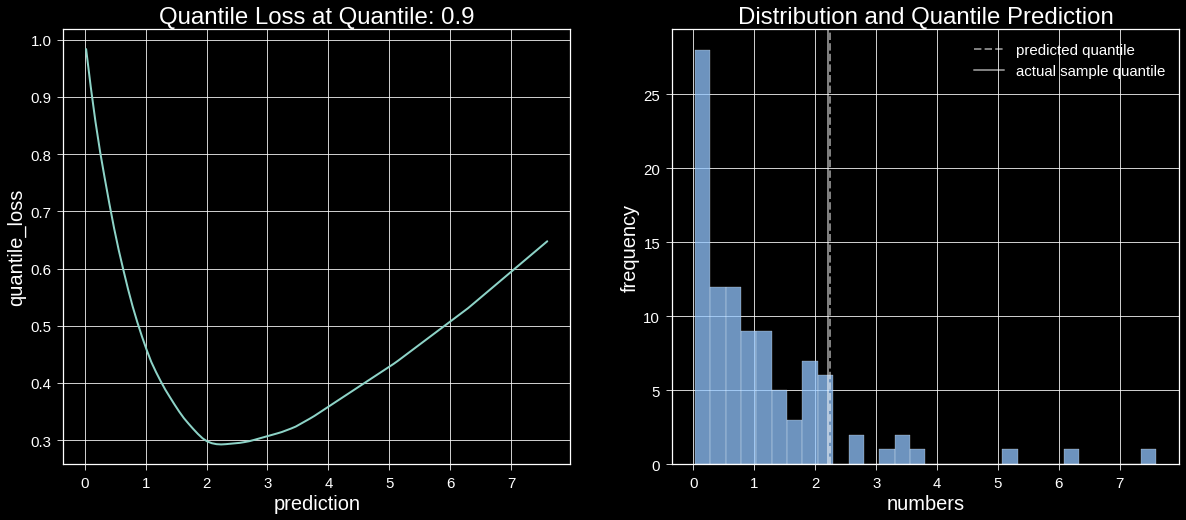

<Figure size 576x432 with 0 Axes>

In [49]:
pred = 0
get_preds = lambda pred: np.ones(numbers.shape) * pred
quantile = 0.9
simulated_predictions = np.linspace(numbers.min(), numbers.max(), 100)
losses = np.array([quantile_loss(numbers, get_preds(pred), quantile) for pred in simulated_predictions])

pred_quantile = simulated_predictions[np.argmin(losses)]

fig, axes = plt.subplots(1,2, figsize=(20,8))

ax = axes[0]
ax.set_title(f'Quantile Loss at Quantile: {quantile}')
sns.lineplot(x=simulated_predictions, y=losses, ax=ax)
ax.set_ylabel('quantile_loss')
ax.set_xlabel('prediction')

plot_numbers_and_preds(pred_quantile, quantile, bins=30, ax=axes[1])

plt.show()